In [172]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipldata/deliveries.csv
/kaggle/input/ipldata/matches.csv


In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 
import matplotlib.ticker as ticker

%matplotlib inline

In [174]:
del_df=pd.read_csv('../input/ipldata/deliveries.csv')
mat_df=pd.read_csv('../input/ipldata/matches.csv')

In [175]:
del_df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [176]:

mat_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [177]:
del_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [178]:
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Let's  Explore matches data first

In [179]:
#Not necesssary for visualization but very important for Modeling
mat_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [180]:
mat_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [181]:
#venues


mat_df['venue'].value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

Maximum matches are played in Eden Gardens

In [182]:
mat_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [183]:
#Correcting Rising pune supergiants
mat_df['team1']=mat_df['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

mat_df['team2'].value_counts()
mat_df['team2']=mat_df['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

mat_df['winner'].value_counts()
mat_df['winner']=mat_df['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [184]:
#Copying this database 
df2=mat_df.copy()

df2=df2.sort_values(by=['season'],ascending=True)

# Let's see which team has won maximum matches with the help of DL method

In [185]:
dl=df2[df2['dl_applied']==1][['team1','team2','winner','toss_decision']]
dl

,team1,team2,winner,toss_decision
102,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat
99,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,bat
148,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat
122,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field
119,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field
251,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field
290,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field
280,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,bat
488,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,field
536,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,field


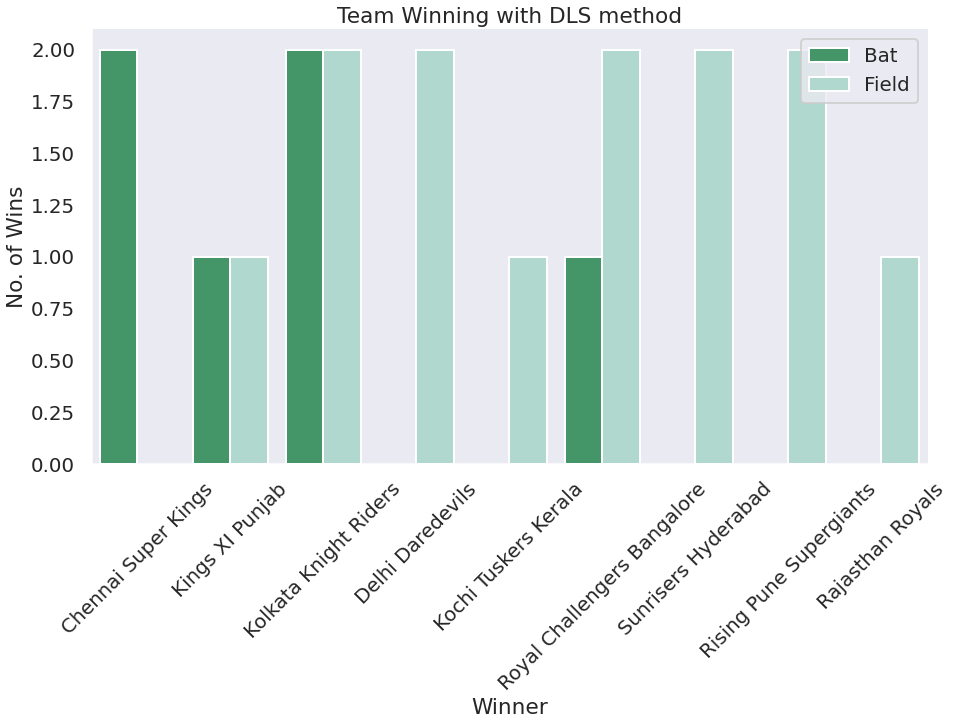

In [186]:
sns.set_style('dark')
plt.figure(figsize=(15,8))
grid=sns.countplot(x='winner',hue='toss_decision',data=dl,palette='BuGn_r')
sns.set_context("poster", font_scale = 0.9)
plt.xlabel('Winner')
plt.ylabel('No. of Wins')
plt.title('Team Winning with DLS method')
x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
plt.legend(['Bat','Field'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# It can be seen that Kolkata Knight Riders have won maximum number of times of DLS method
## 2 -Batting First
## 2 -Bowling First

In [187]:
df3=df2[['season','team1','team2' ,'city','winner','venue','toss_decision']]
df3.head()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 116 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   season         756 non-null    int64 
 1   team1          756 non-null    object
 2   team2          756 non-null    object
 3   city           749 non-null    object
 4   winner         752 non-null    object
 5   venue          756 non-null    object
 6   toss_decision  756 non-null    object
dtypes: int64(1), object(6)
memory usage: 47.2+ KB


(0.0, 90.0)

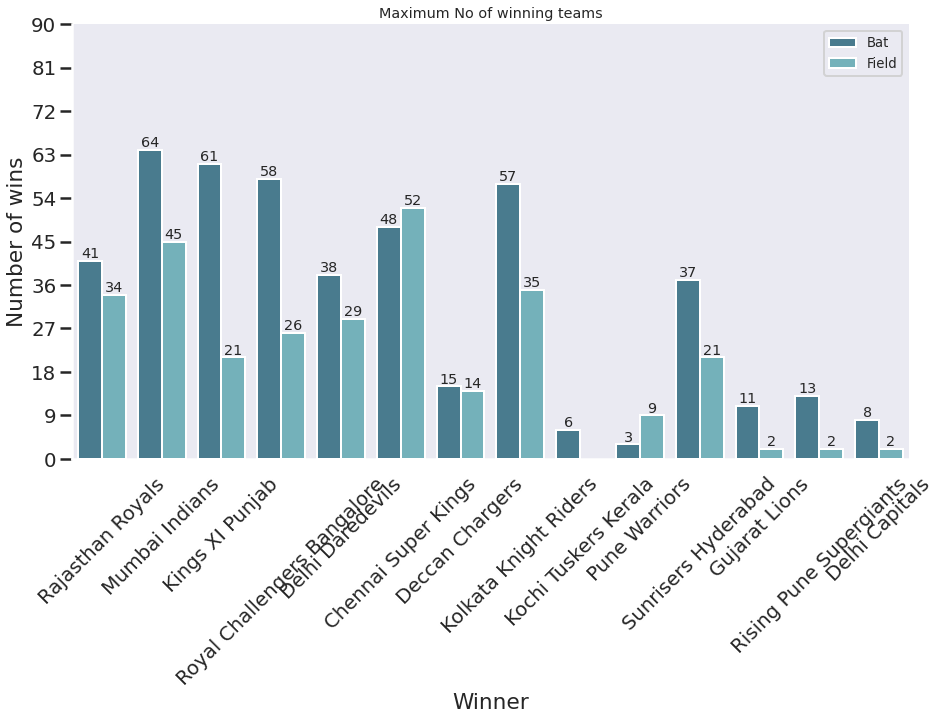

In [188]:
sns.set_style('dark')
plt.figure(figsize=(15,8))
ax=sns.countplot(x='winner',hue='toss_decision',data=df3,palette='GnBu_d',order=None)
sns.set_context("poster", font_scale = 0.6)
plt.xlabel('Winner')
plt.ylabel('Number of wins')
plt.title('Maximum No of winning teams')
x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
plt.legend(['Bat','Field'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Switch so count axis is on right, frequency on left
ax.yaxis.tick_left()

# Also switch the labels over
ax.yaxis.set_label_position('left')

ncount = 90
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
#ax2.set_ylim(0,50)
ax.set_ylim(0,ncount)


## 1. Mumbai Indians has Won Maximum Number of matches (109 matches) overall in IPL
## 2. Any team batting First has been on a winning side for maximum time except(Chennai Super Kings) 
  

# UMPIRES 

In [189]:
df4=df2[['umpire1','umpire2','winner']]
df4['umpire1'].value_counts().head()



HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
Name: umpire1, dtype: int64

(0.0, 100.0)

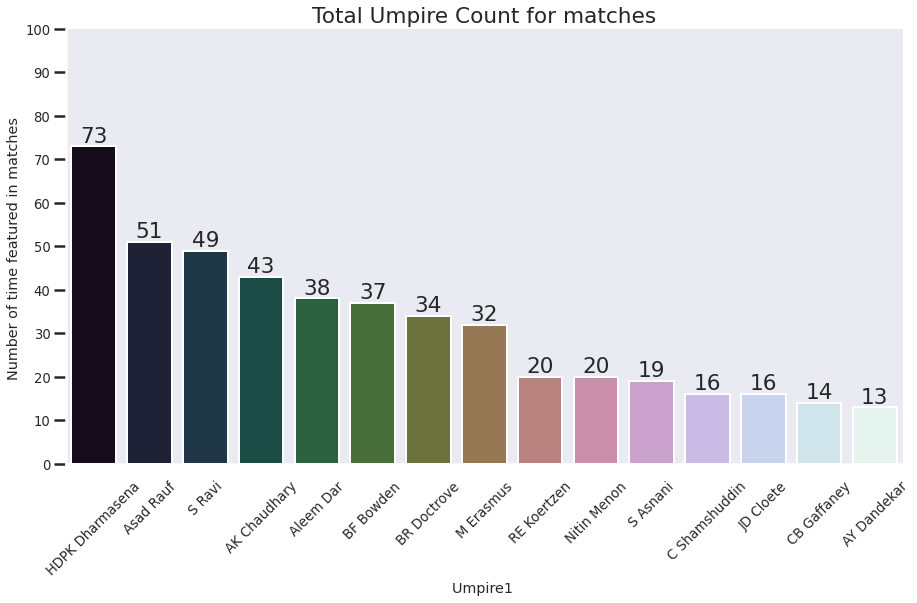

In [190]:
sns.set_style('dark')
plt.figure(figsize=(15,8))
ax=sns.countplot(x='umpire1',data=df4,palette=('cubehelix'),order=df4['umpire1'].value_counts().iloc[:15].index)
sns.set_context("poster", font_scale = 0.9)
plt.xlabel('Umpire1 ')
plt.ylabel('Number of time featured in matches ')
plt.title('Total Umpire Count for matches')
x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
#plt.legend(['Bat','Field'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax.yaxis.tick_left()


ax.yaxis.set_label_position('left')
ncount = 100
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text

    
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

(0.0, 100.0)

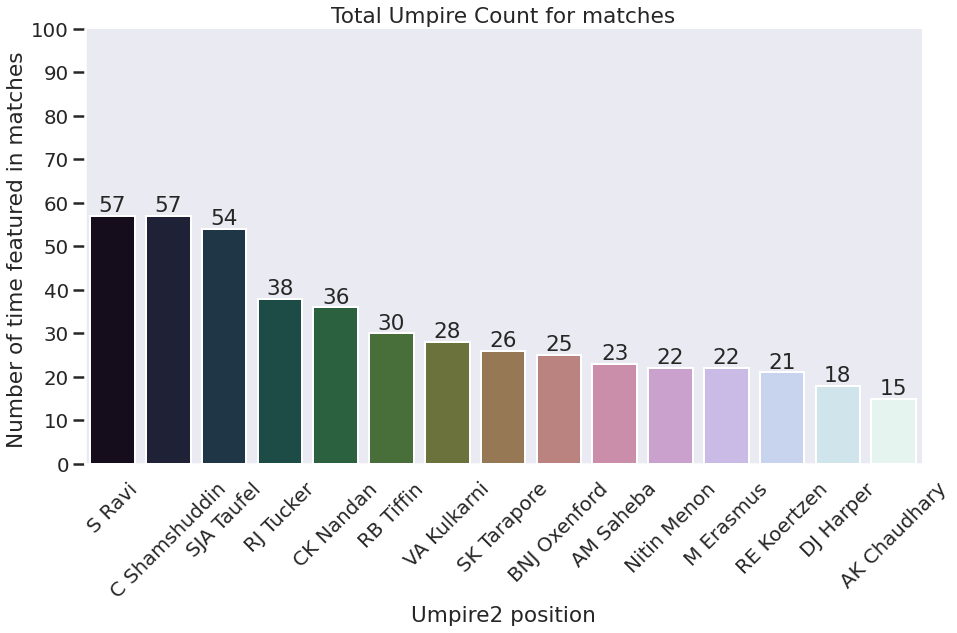

In [191]:

plt.figure(figsize=(15,8))
ax=sns.countplot(x='umpire2',data=df4,palette=('cubehelix'),order=df2['umpire2'].value_counts().iloc[:15].index)
sns.set_context("poster", font_scale = 0.9)
plt.xlabel('Umpire2 position')
plt.ylabel('Number of time featured in matches ')
plt.title('Total Umpire Count for matches')
x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
#plt.legend(['Bat','Field'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax.yaxis.tick_left()


ax.yaxis.set_label_position('left')
ncount = 100
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text

    
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

In [192]:
df4['umpire2'].value_counts().tail(10)

Nigel Llong              2
SD Ranade                2
KN Ananthapadmanabhan    1
Kumar Dharmasena         1
Ian Gould                1
Subroto Das              1
Nand Kishore             1
SJ Davis                 1
SD Fry                   1
JD Cloete                1
Name: umpire2, dtype: int64

### WOW!! Kumar Dharmasena has been umpire1 for maximum time and has served as umpire2 for just 1 time 

NOTE : HDPK Dharmasena in umpire1 and Kumar Dharmasena in umpire2 is the same person.

In [193]:
u1=df4[(df4['umpire1']=='HDPK Dharmasena')  |  (df4['umpire2']=='Kumar Dharmasena')]['winner'].index.tolist()

df_ump=df4['winner'].iloc[u1]
print(len(df_ump))
df_ump.value_counts()

74


Kolkata Knight Riders          14
Mumbai Indians                 11
Kings XI Punjab                11
Delhi Daredevils                7
Rajasthan Royals                6
Royal Challengers Bangalore     6
Rising Pune Supergiants         5
Chennai Super Kings             4
Deccan Chargers                 3
Sunrisers Hyderabad             2
Kochi Tuskers Kerala            2
Gujarat Lions                   2
Name: winner, dtype: int64

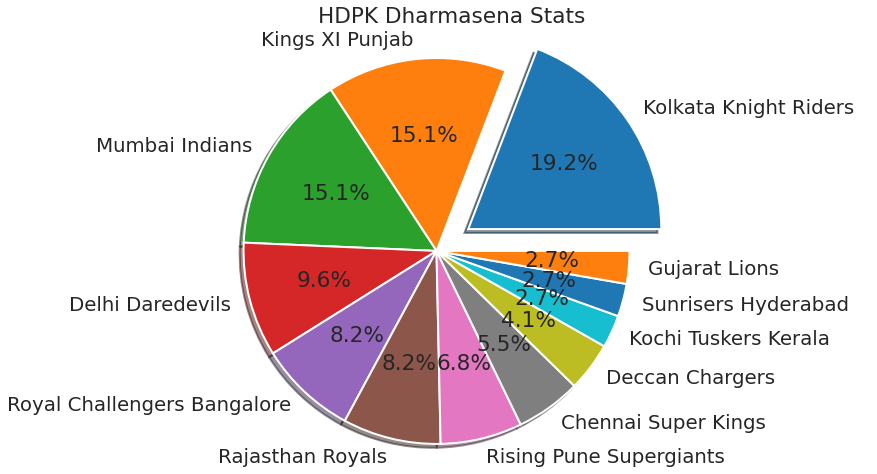

In [194]:
labels = ('Kolkata Knight Riders ', 'Kings XI Punjab', 'Mumbai Indians', 'Delhi Daredevils' , 'Royal Challengers Bangalore','Rajasthan Royals','Rising Pune Supergiants','Chennai Super Kings','Deccan Chargers ','Kochi Tuskers Kerala','Sunrisers Hyderabad','Gujarat Lions')
sizes = [14, 11,11,7,6,6,5,4,3,2,2,2]
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0)  # explode 1st slice ie how much slice will be separated


# Plot
plt.figure(figsize=(15,8))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True)#autopct will show percentage in floating channel
plt.axis('equal')
plt.title('HDPK Dharmasena Stats')
plt.show()

HDPK Dharmasena when featured as umpire1 or umpire2 it's seen that **Kolkata Knight Riders** has one the maximum number of times.

In [195]:
df5=df2[['city','toss_decision','winner']]
df5.head()

,city,toss_decision,winner
116,Mumbai,field,Rajasthan Royals
82,Jaipur,bat,Rajasthan Royals
81,Mumbai,field,Mumbai Indians
80,Chandigarh,bat,Kings XI Punjab
79,Hyderabad,bat,Royal Challengers Bangalore


In [196]:
df5['city'].value_counts()
df_cpy=del_df.copy()

In [197]:

#Replacing delhi daredivels to delhi capitals
df2['team1']=df2['team1'].replace('Delhi Daredevils','Delhi Capitals')

df2['team2'].value_counts()
df2['team2']=df2['team2'].replace('Delhi Daredevils','Delhi Capitals')

df2['winner'].value_counts()
df2['winner']=df2['winner'].replace('Delhi Daredevils','Delhi Capitals')


#Replacing Delhi Daredevils o Delhi Capitals for deliveries dataset
df_cpy.info()
df_cpy['batting_team'].unique()

df_cpy['batting_team']=df_cpy['batting_team'].replace('Delhi Daredevils','Delhi Capitals')

df_cpy['bowling_team'].value_counts()
df_cpy['bowling_team']=df_cpy['bowling_team'].replace('Delhi Daredevils','Delhi Capitals')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Maximum matches are played in Mumbai

## The above was the basic skeleton

### !!!Please use this statement --->  df_cpy=del_df.copy()  ..at this point in all previously submitted code till Day 13 to avoid one error

# Day21 - RCB vs SRH

In [331]:
df_cpy=del_df.copy()
#df2 for matches dataset and df_cpy for deleveries datase
df2['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [332]:
day21=df2[((df2['team1']=='Royal Challengers Bangalore') & (df2['team2']=='Sunrisers Hyderabad')) |(df2['team2']=='Royal Challengers Bangalore') & (df2['team1']=='Sunrisers Hyderabad')]
day21.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
431,432,2013,Bangalore,2013-04-09,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Royal Challengers Bangalore,0,7,V Kohli,M Chinnaswamy Stadium,S Ravi,SJA Taufel,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
480,481,2014,Bangalore,2014-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VA Kulkarni,NaN
502,503,2014,Hyderabad,2014-05-20,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,normal,0,Sunrisers Hyderabad,0,7,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,NJ Llong,NaN
524,525,2015,Bangalore,2015-04-13,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,8,DA Warner,M Chinnaswamy Stadium,RM Deshpande,RK Illingworth,NaN


In [333]:
#No of matches played between them
matches=df_cpy[((df_cpy['batting_team']=='Royal Challengers Bangalore') & (df_cpy['bowling_team']=='Sunrisers Hyderabad')) |(df_cpy['batting_team']=='Sunrisers Hyderabad') & (df_cpy['bowling_team']=='Royal Challengers Bangalore')]['match_id'].nunique()
matches

14

In [334]:
#Head to Head 

print("No of times SRH won the match : "+ str(len(day21[day21['winner']=='Sunrisers Hyderabad'])))
print("No of times RCB won the match : "+ str(len(day21[day21['winner']=='Royal Challengers Bangalore'])))

No of times SRH won the match : 8
No of times RCB won the match : 6


In [335]:
d21=df_cpy[((df_cpy['batting_team']=='Royal Challengers Bangalore') & (df_cpy['bowling_team']=='Sunrisers Hyderabad')) |((df_cpy['batting_team']=='Sunrisers Hyderabad') & (df_cpy['bowling_team']=='Royal Challengers Bangalore'))  ]
d21.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [336]:
#RUNS Totally sscored in a match

#Lets calculate total runs scored by both teams collectively in all matches 

rcb_runs=d21[(d21['batting_team']=='Royal Challengers Bangalore')]['total_runs'].sum()
print("RCB total runs : " + str(rcb_runs))

srh_runs=d17[(d17['batting_team']=='Sunrisers Hyderabad')]['total_runs'].sum()
print("SRH  total runs : " + str(srh_runs))

print("Total runs of both the teams collectively : " + str(rcb_runs + srh_runs))

print("\n---------------------------------------------------------------------")

#Average total of both the teams 

avg=(rcb_runs + srh_runs)/matches

print("\nAverage total runs of a match is : " + str(avg))

RCB total runs : 2327
SRH  total runs : 2227
Total runs of both the teams collectively : 4554

---------------------------------------------------------------------

Average total runs of a match is : 325.2857142857143


In [337]:
#How many balls will rcb take to reach total  runs of 30 from after they reach a team total of 50 as compared to SRH 



#Balls RCB would take to reach 50 runs 
filt=d21.copy()
filt['ball']=filt['ball'].replace([2,3,4,5,6],1)
filt=filt[(filt['batting_team']=="Royal Challengers Bangalore")]
filt.head()


rcb_id =list(filt[filt['batting_team']=='Royal Challengers Bangalore']['match_id'].unique())
rcb_tot=[]
for i in rcb_id:
    s=0
    ct=0
    balls=0
    b_cums=list(filt[(filt['match_id']==i)]['ball'])
    runs_cums=list(filt[(filt['match_id']==i)]['total_runs'])
    
    for j in range (0,len(runs_cums)):
        
        if(s<=50):
            
        
            s=s+runs_cums[j]
            balls=balls+b_cums[ct]
            ct=ct+1
            
        else:
            rcb_tot.append([s,balls])
            break
            
print(rcb_tot)


#Taking the mean of the following

arr= np.array(rcb_tot)

print("\n Mean balls taken to reach 50 runs by RCB : "+ str(arr[:,1].mean()))

print("\n Median balls taken to reach 50 runs by RCB : "+ str(np.median(arr,axis=0)))


[[52, 46], [52, 70], [51, 56], [51, 76], [52, 62], [52, 66], [52, 30], [51, 51], [51, 47], [53, 50], [52, 38], [51, 42], [55, 68], [51, 63]]

 Mean balls taken to reach 50 runs by RCB : 54.642857142857146

 Median balls taken to reach 50 runs by RCB : [52.  53.5]


In [338]:

#Balls RCB would take to reach 80 runs 
filt=d21.copy()
filt['ball']=filt['ball'].replace([2,3,4,5,6],1)
filt=filt[(filt['batting_team']=="Royal Challengers Bangalore")]
filt.head()


rcb_id =list(filt[filt['batting_team']=='Royal Challengers Bangalore']['match_id'].unique())
rcb_tot2=[]
for i in rcb_id:
    s=0
    ct=0
    balls=0
    b_cums=list(filt[(filt['match_id']==i)]['ball'])
    runs_cums=list(filt[(filt['match_id']==i)]['total_runs'])
    
    for j in range (0,len(runs_cums)):
        
        if(s<=80):
            
        
            s=s+runs_cums[j]
            balls=balls+b_cums[ct]
            ct=ct+1
            
        else:
            rcb_tot2.append([s,balls])
            break
            
print(rcb_tot2)


#Taking the mean of the following

arr2= np.array(rcb_tot2)

print("\n Mean balls taken to reach 80 runs by RCB : "+ str(arr2[:,1].mean()))

print("\n Median balls taken to reach 80 runs by RCB : "+ str(np.median(arr2,axis=0)))

# mean diff : 26
#median diff : 22

[[84, 68], [81, 95], [81, 71], [85, 107], [82, 75], [84, 102], [81, 71], [81, 64], [83, 78], [81, 75], [83, 59], [84, 87], [81, 89]]

 Mean balls taken to reach 80 runs by RCB : 80.07692307692308

 Median balls taken to reach 80 runs by RCB : [82. 75.]


In [339]:
#How many balls will rcb take to reach total  runs of 30 from after they reach a team total of 50 as compared to SRH 



#Balls SRH  would take to reach 50 runs 
filt=d21.copy()
filt['ball']=filt['ball'].replace([2,3,4,5,6],1)
filt=filt[(filt['batting_team']=="Sunrisers Hyderabad")]
filt.head()


srh_id =list(filt[filt['batting_team']=='Sunrisers Hyderabad']['match_id'].unique())
srh_tot=[]
for i in srh_id:
    s=0
    ct=0
    balls=0
    b_cums=list(filt[(filt['match_id']==i)]['ball'])
    runs_cums=list(filt[(filt['match_id']==i)]['total_runs'])
    
    for j in range (0,len(runs_cums)):
        
        if(s<=50):
            
        
            s=s+runs_cums[j]
            balls=balls+b_cums[ct]
            ct=ct+1
            
        else:
            srh_tot.append([s,balls])
            break
            
print(srh_tot)


#Taking the mean of the following

arr_srh= np.array(srh_tot)

print("\n Mean balls taken to reach 50 runs by SRH : "+ str(arr_srh[:,1].mean()))

print("\n Median balls taken to reach 50 runs by SRH : "+ str(np.median(arr_srh,axis=0)))


[[54, 48], [51, 79], [51, 49], [51, 62], [51, 43], [51, 33], [52, 38], [56, 41], [52, 54], [52, 40], [51, 63], [51, 33], [51, 30], [52, 30]]

 Mean balls taken to reach 50 runs by SRH : 45.92857142857143

 Median balls taken to reach 50 runs by SRH : [51. 42.]


In [340]:
#How many balls will rcb take to reach total  runs of 30 from after they reach a team total of 50 as compared to SRH 



#Balls SRH  would take to reach 80 runs 
filt=d21.copy()
filt['ball']=filt['ball'].replace([2,3,4,5,6],1)
filt=filt[(filt['batting_team']=="Sunrisers Hyderabad")]
filt.head()


srh_id =list(filt[filt['batting_team']=='Sunrisers Hyderabad']['match_id'].unique())
srh_tot2=[]
for i in srh_id:
    s=0
    ct=0
    balls=0
    b_cums=list(filt[(filt['match_id']==i)]['ball'])
    runs_cums=list(filt[(filt['match_id']==i)]['total_runs'])
    
    for j in range (0,len(runs_cums)):
        
        if(s<=80):
            
        
            s=s+runs_cums[j]
            balls=balls+b_cums[ct]
            ct=ct+1
            
        else:
            srh_tot2.append([s,balls])
            break
            
print(srh_tot2)


#Taking the mean of the following

arr_srh2= np.array(srh_tot2)

print("\n Mean balls taken to reach 80 runs by SRH : "+ str(arr_srh2[:,1].mean()))

print("\n Median balls taken to reach 80 runs by SRH : "+ str(np.median(arr_srh2,axis=0)))


#mean diff : 73-45 = 28
#median diff : 67-42=25

[[82, 67], [81, 109], [82, 87], [81, 94], [83, 72], [81, 52], [85, 63], [83, 62], [81, 81], [81, 65], [81, 100], [82, 56], [82, 51], [81, 68]]

 Mean balls taken to reach 80 runs by SRH : 73.35714285714286

 Median balls taken to reach 80 runs by SRH : [81.5 67.5]


In [341]:
#Wickets in Powerplay



rcb_wic=d21[(d21['batting_team']=='Royal Challengers Bangalore') &((d21['over']>=1) & (d21['over']<=6))]['dismissal_kind'].count()
print("Total RCB wickets fall in powerplay  and AVG :" + str(rcb_wic) + " and " + str(rcb_wic/matches))

srh_wic=d21[(d21['batting_team']=='Sunrisers Hyderabad') &((d21['over']>=1) & (d21['over']<=6))]['dismissal_kind'].count()
print("Total SRH wickets fall in powerplay and AVG :" + str(srh_wic)+ " and " + str(srh_wic/matches))



print('Mean wickets of both team :' + str((rcb_wic+srh_wic)/matches))



#OVERALL
print("\nRCB")

rcb_mat=df_cpy[(df_cpy['batting_team']=='Royal Challengers Bangalore')]['match_id'].nunique()
srh_mat=df_cpy[(df_cpy['batting_team']=='Sunrisers Hyderabad')]['match_id'].nunique()


rcb_wic=df_cpy[(df_cpy['batting_team']=='Royal Challengers Bangalore') &((df_cpy['over']>=1) & (df_cpy['over']<=6))]['dismissal_kind'].count()
print("OVERALL Total RCB  wickets fall in powerplay :" + str(rcb_wic))

print('\nRCB Overall Wickets in powerplay :' + str((rcb_wic)/rcb_mat))


print("\nSRH")
srh_wic=df_cpy[(df_cpy['batting_team']=='Sunrisers Hyderabad') &((df_cpy['over']>=1) & (df_cpy['over']<=6))]['dismissal_kind'].count()
print("OVERALL Total SRH wickets fall in powerplay" + str(srh_wic))

print('\nSRH Overall Wickets in powerplay :' + str((srh_wic)/srh_mat))


Total RCB wickets fall in powerplay  and AVG :24 and 1.7142857142857142
Total SRH wickets fall in powerplay and AVG :13 and 0.9285714285714286
Mean wickets of both team :2.642857142857143

RCB
OVERALL Total RCB  wickets fall in powerplay :268

RCB Overall Wickets in powerplay :1.488888888888889

SRH
OVERALL Total SRH wickets fall in powerplay131

SRH Overall Wickets in powerplay :1.212962962962963


In [342]:
#Dot balls bowled in entire match 


rcb_dot=d21[(d21['bowling_team']=='Royal Challengers Bangalore') &(d21['extra_runs']==0) & (d21['batsman_runs']==0)]['ball'].count()
print("Total RCB dot balls :" + str(rcb_dot))

srh_dot=d21[(d21['bowling_team']=='Sunrisers Hyderabad') &(d21['extra_runs']==0) & (d21['batsman_runs']==0)]['ball'].count()
print("Total SRH dot balls :" + str(srh_dot))



print('Mean dot balls of both team :' + str((rcb_dot+srh_dot)/matches))



#OVERALL


rcb_mat=df_cpy[(df_cpy['bowling_team']=='Royal Challengers Bangalore')]['match_id'].nunique()
srh_mat=df_cpy[(df_cpy['bowling_team']=='Sunrisers Hyderabad')]['match_id'].nunique()


print("\nRCB")
rcb_dot=df_cpy[(df_cpy['bowling_team']=='Royal Challengers Bangalore') &(df_cpy['extra_runs']==0) & (df_cpy['batsman_runs']==0)]['ball'].count()
print("Overall Total RCB dot balls :" + str(rcb_dot))
print('RCB Overall Mean dot balls :' + str((rcb_dot)/rcb_mat))



print("\nSRH")
srh_dot=df_cpy[(df_cpy['bowling_team']=='Sunrisers Hyderabad') &(df_cpy['extra_runs']==0) & (df_cpy['batsman_runs']==0)]['ball'].count()
print("Overall Total KXIP dot balls :" + str(srh_dot))



print('KXIP Overall Mean dot balls  :' + str((srh_dot)/srh_mat))


Total RCB dot balls :493
Total SRH dot balls :570
Mean dot balls of both team :75.92857142857143

RCB
Overall Total RCB dot balls :7332
RCB Overall Mean dot balls :40.960893854748605

SRH
Overall Total KXIP dot balls :4595
KXIP Overall Mean dot balls  :42.5462962962963
